<a href="https://colab.research.google.com/github/Camila20197/Futura-Ganadera/blob/main/Primera_Entrega_Durand_Camila_Ayelen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Futura Ganadera
##Objetivo
Aplicar algoritmos de clustering para identificar y caracterizar regiones con patrones de compra y venta similares de terneros y novillitos, con el fin de proporcionar información valiosa para la toma de decisiones en el mercado ganadero.

##Preguntas hipótesis
* ¿Existen grupos de regiones con patrones de compra y venta de terneros y novillitos claramente definidos?.
* ¿Qué características definen a cada grupo de regiones? (Por ejemplo, volumen de compra/venta, estacionalidad, origen/destino del ganado).
* ¿Qué factores geográficos  influyen en la formación de estos grupos?.
* ¿Cómo varían los patrones de compra y venta a en las diferentes estaciones del año?.
* ¿Existen regiones que actúan como "centros de distribución" de terneros y novillitos? (Por ejemplo, Buenos Aires o Córdoba).


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd

In [40]:
ruta_dataset = '/content/drive/MyDrive/CoderHouse/Data Science II/Proyecto Final/movimiento-bovinos-2018.csv'
df = pd.read_csv(ruta_dataset, encoding='latin-1') # Changed line: Added encoding='latin-1'
df.head()

,fecha,salido_de,ingresado_a,provincia_origen,provincia_origen_id,departamento_origen,departamento_origen_id,provincia_destino,provincia_destino_id,departamento_destino,departamento_destino_id,vaca,vaquillona,novillo,novillito,ternero,ternera,torito,toro,bueyes
0,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,25 de Mayo,6854,212,150,0,342,931,566,0,21,0
1,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,9 de Julio,6588,35,0,0,0,96,104,0,4,0
2,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Alberti,6021,0,0,0,0,31,9,0,0,0
3,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bolívar,6105,0,0,0,0,29,39,0,0,0
4,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bragado,6112,0,0,0,0,11,14,0,0,0


In [41]:
print("Tamaño de mi dataset:", df.shape)

Tamaño de mi dataset: (168802, 20)


Se revisan las ultimas fechas para asegurar la persistencia de los datos. Se verificó que las ultimas filas contienen información coherente.

In [12]:
df.tail()

,fecha,salido_de,ingresado_a,provincia_origen,provincia_origen_id,departamento_origen,departamento_origen_id,provincia_destino,provincia_destino_id,departamento_destino,departamento_destino_id,vaca,vaquillona,novillo,novillito,ternero,ternera,torito,toro,bueyes
168797,2018-12,Remate feria,Frigorífico,Santiago del Estero,86,Robles,86161,Santa Fe,82,Vera,82133,0,37,0,0,0,0,26,0,0
168798,2018-12,Remate feria,Frigorífico,Santiago del Estero,86,Robles,86161,Santiago del Estero,86,Robles,86161,92,176,19,1,0,0,2,12,0
168799,2018-12,Remate feria,Frigorífico,Santiago del Estero,86,Robles,86161,Tucumán,90,Capital,90084,0,7,0,13,0,0,0,0,0
168800,2018-12,Remate feria,Frigorífico,Santiago del Estero,86,Robles,86161,Tucumán,90,Leales,90056,25,20,0,12,0,0,8,0,0
168801,2018-12,Remate feria,Frigorífico,Santiago del Estero,86,Robles,86161,Tucumán,90,Lules,90063,0,0,0,14,0,0,0,0,0


Visualizamos la información general del dataset.
* A primera vista parecería que no hay valores nulos.
* Variables más importantes: provicia de origen, provincia de destino, salido de, ingresado a, novillo, novillito y ternero.
* Hay columnas que muy posiblemente no se sean necesarias para ayudarnos a resolver el objetivo principal de nuestro problema: ternera, torito, toro y bueyes.
* Vaca y vaquillona hay que estudiar más a fondo la relación con nuestras variables de interes.
* En el caso de las variables departamento podrían eliminarse para este primer modelo y solo tener en cuenta la provincias.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168802 entries, 0 to 168801
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   fecha                    168802 non-null  object
 1   salido_de                168802 non-null  object
 2   ingresado_a              168802 non-null  object
 3   provincia_origen         168802 non-null  object
 4   provincia_origen_id      168802 non-null  int64 
 5   departamento_origen      168802 non-null  object
 6   departamento_origen_id   168802 non-null  int64 
 7   provincia_destino        168802 non-null  object
 8   provincia_destino_id     168802 non-null  int64 
 9   departamento_destino     168802 non-null  object
 10  departamento_destino_id  168802 non-null  int64 
 11  vaca                     168802 non-null  int64 
 12  vaquillona               168802 non-null  int64 
 13  novillo                  168802 non-null  int64 
 14  novillito           

Vamos a realizar un vista general de los valores estadisticos de las variables numericas.
* Observando los valores estadisticos de los cuartiles, se ve que son cero. Esto se debe a una alta cantidad de valores cero en el dataset.
* Posible solución: luego de eliminar las variables que no son de interes eliminar las filas dinde novillo, novillito y ternero tienen valores cero.

In [14]:
df.describe()

,provincia_origen_id,departamento_origen_id,provincia_destino_id,departamento_destino_id,vaca,vaquillona,novillo,novillito,ternero,ternera,torito,toro,bueyes
count,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000,168802.000000
mean,27.445125,27658.608666,29.831021,30064.051291,42.388337,35.813823,26.340950,37.402928,42.617516,33.294819,1.282023,3.313681,0.002927
std,26.857114,26744.951837,29.547682,29416.051202,156.953718,132.454762,118.959993,147.214797,147.858749,125.992010,12.434034,15.230203,0.662959
min,2.000000,2000.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6511.000000,6.000000,6539.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,14168.000000,14.000000,14119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,42056.000000,50.000000,50049.000000,32.000000,27.000000,8.000000,26.000000,33.000000,23.000000,0.000000,1.000000,0.000000
max,94.000000,94015.000000,94.000000,94015.000000,10027.000000,8242.000000,5960.000000,8264.000000,6583.000000,6970.000000,1075.000000,1170.000000,262.000000


In [15]:
df.isnull().sum()

,0
fecha,0
salido_de,0
ingresado_a,0
provincia_origen,0
provincia_origen_id,0
departamento_origen,0
departamento_origen_id,0
provincia_destino,0
provincia_destino_id,0
departamento_destino,0


Los valores de la variables salido_de  e ingresado_a tienen valores correctos.

In [16]:
df.salido_de.value_counts()

,count
salido_de,
Establecimiento,137813
Remate feria,30984
Puesto de frontera,5


In [17]:
df.ingresado_a.value_counts()

,count
ingresado_a,
Establecimiento,91245
Frigorífico,62294
Remate feria,15263


Control de los valores de la variable relacionadas a los departamentos.

In [18]:
df.departamento_origen.value_counts()

,count
departamento_origen,
9 de Julio,2076
San Justo,1972
Ayacucho,1929
Coronel Pringles,1749
Capital,1727
...,...
Humahuaca,1
Zonda,1
Santa Lucía,1


In [19]:
df.departamento_destino.value_counts()

,count
departamento_destino,
Capital,3695
Rosario,3440
Caseros,2349
Río Cuarto,2321
General López,2147
...,...
Tilcara,2
Ullum,1
Santa Lucía,1


Control de los valores de las variables provicia_origen y provincia_destino

In [20]:
df.provincia_origen.value_counts()

,count
provincia_origen,
Buenos Aires,67861
Córdoba,16748
Santa Fe,14253
Entre Ríos,12527
La Pampa,11769
Corrientes,10819
Chaco,9505
Santiago del Estero,5267
San Luis,4508


In [21]:
df.provincia_destino.value_counts()

,count
provincia_destino,
Buenos Aires,69288
Santa Fe,21052
Córdoba,17716
La Pampa,9358
Entre Ríos,9154
Chaco,7298
Corrientes,5302
Santiago del Estero,4803
San Luis,3698


Para mejorar el entendimiento del dataset se van a cambiar los nombres de las variables salidos_ ingresa_a por origen y detino.

In [42]:
df = df.rename(columns={'salido_de': 'origen', 'ingresado_a': 'destino'})
df.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,departamento_origen,departamento_origen_id,provincia_destino,provincia_destino_id,departamento_destino,departamento_destino_id,vaca,vaquillona,novillo,novillito,ternero,ternera,torito,toro,bueyes
0,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,25 de Mayo,6854,212,150,0,342,931,566,0,21,0
1,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,9 de Julio,6588,35,0,0,0,96,104,0,4,0
2,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Alberti,6021,0,0,0,0,31,9,0,0,0
3,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bolívar,6105,0,0,0,0,29,39,0,0,0
4,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bragado,6112,0,0,0,0,11,14,0,0,0


A travez de la visualizacion mediante graficos se detecto muchos valores ceros, lo que provoca ruido en nuestro en el analisis de los datos.
Se optó por eleminar aquellas filas en donde novillo, novillito y ternero son cero e eliminar las variables: vaca vaquilla, vaquillona, ternera, torito, toro y bueyes

<ipython-input-22-d96f017d734f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='novillo', data=df, palette='pastel')


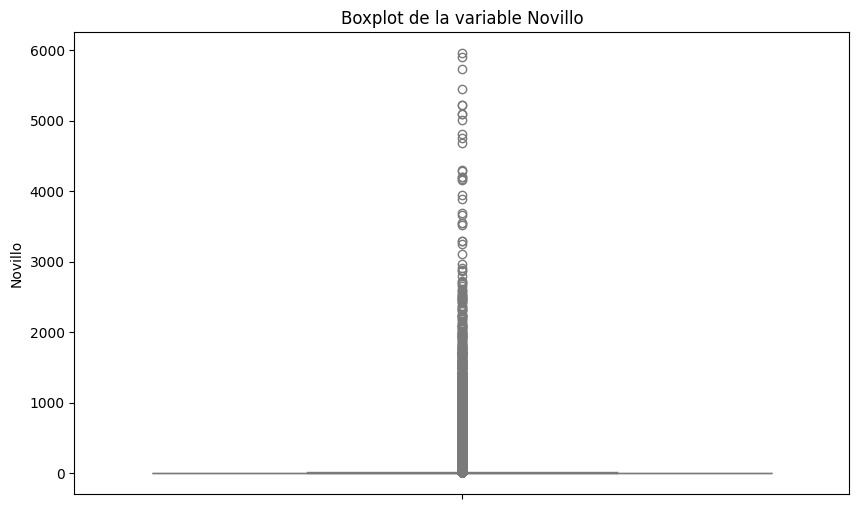

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='novillo', data=df, palette='pastel')
plt.title('Boxplot de la variable Novillo')
plt.ylabel('Novillo')
plt.show()


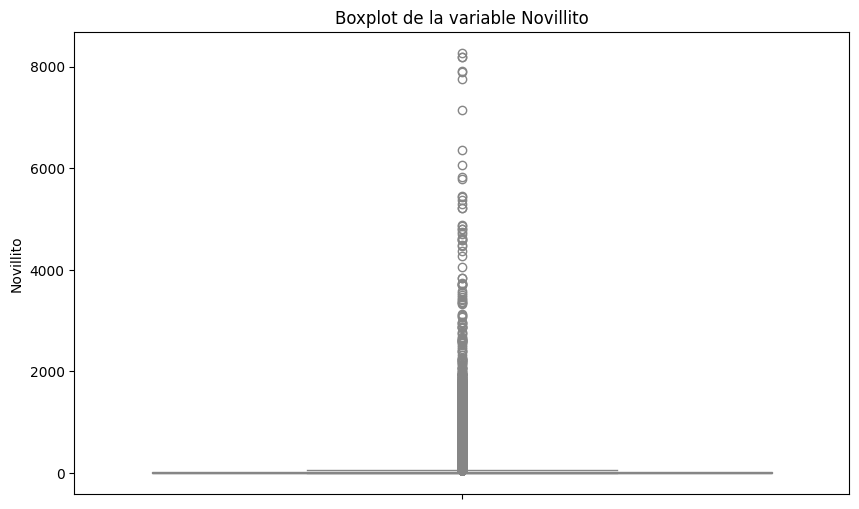

In [24]:

plt.figure(figsize=(10, 6))
sns.boxplot(y='novillito', data=df, color='pink')  # Use 'pink' for a pastel pink color
plt.title('Boxplot de la variable Novillito')
plt.ylabel('Novillito')
plt.show()


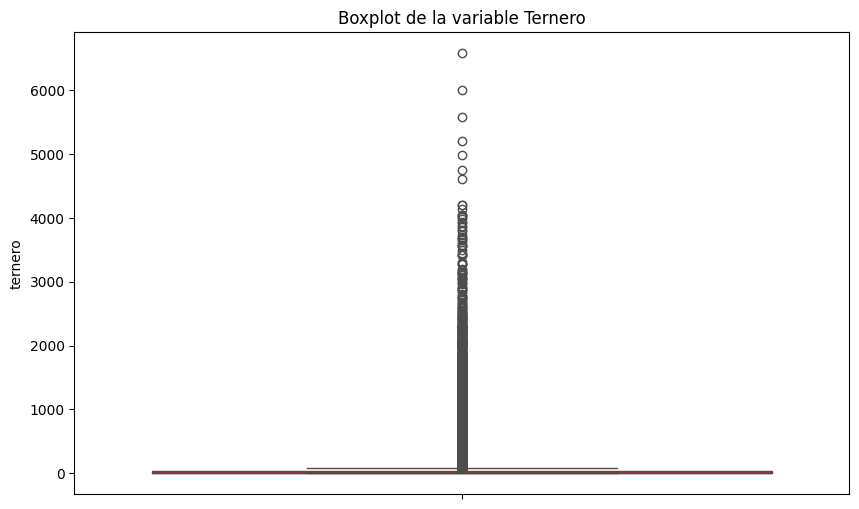

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='ternero', data=df, color='red')  # Use 'pink' for a pastel pink color
plt.title('Boxplot de la variable Ternero')
plt.ylabel('ternero')
plt.show()


Vacas y vaquillonas son las que dan a luz a nuevos bebes, mediante graficos de dispersion se buscó alguna relación entre ambas variables pero no se encontró que haya una relación clara.

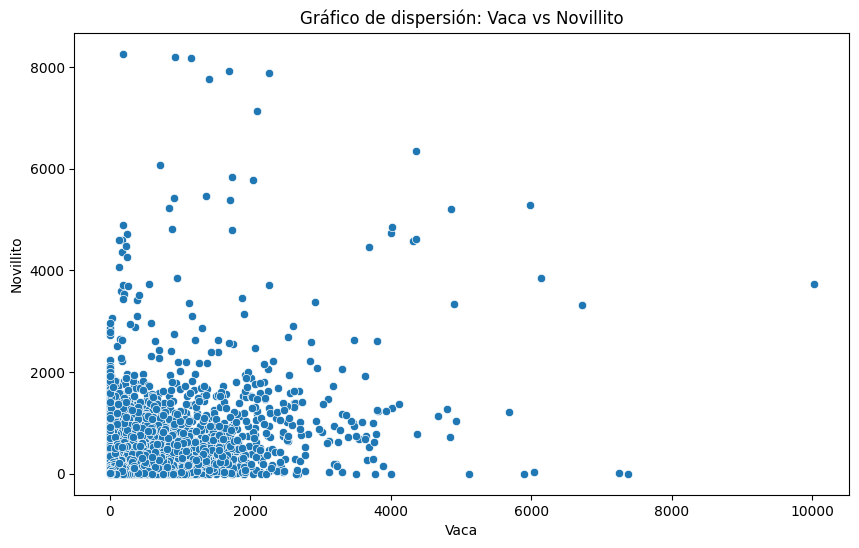

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vaca', y='novillito', data=df)
plt.title('Gráfico de dispersión: Vaca vs Novillito')
plt.xlabel('Vaca')
plt.ylabel('Novillito')
plt.show()

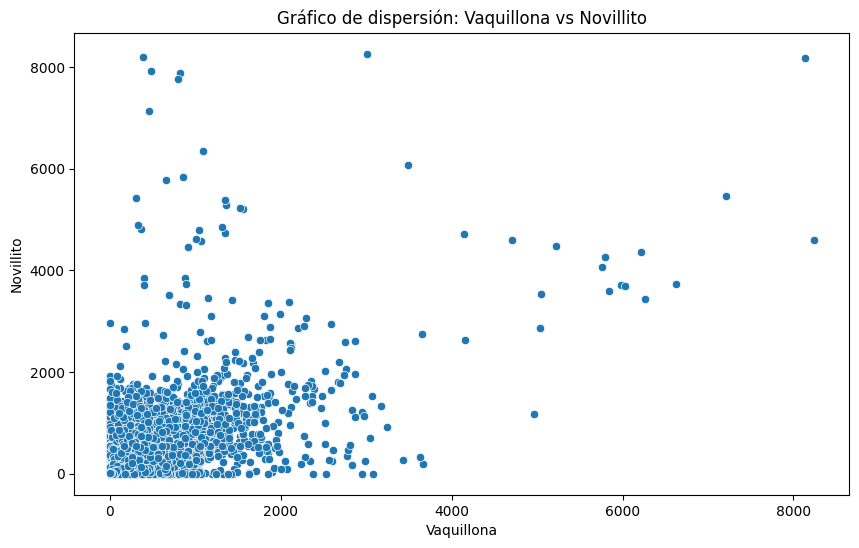

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vaquillona', y='novillito', data=df)
plt.title('Gráfico de dispersión: Vaquillona vs Novillito')
plt.xlabel('Vaquillona')
plt.ylabel('Novillito')
plt.show()

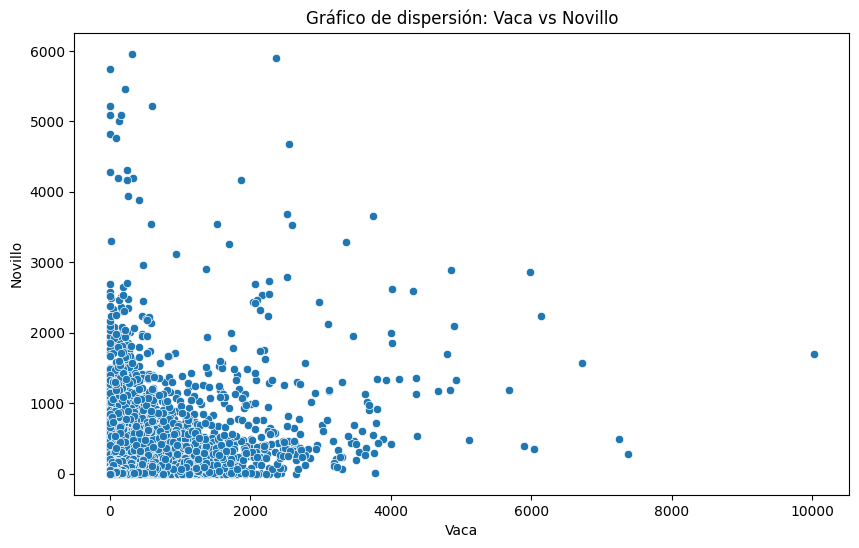

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vaca', y='novillo', data=df)
plt.title('Gráfico de dispersión: Vaca vs Novillo')
plt.xlabel('Vaca')
plt.ylabel('Novillo')
plt.show()

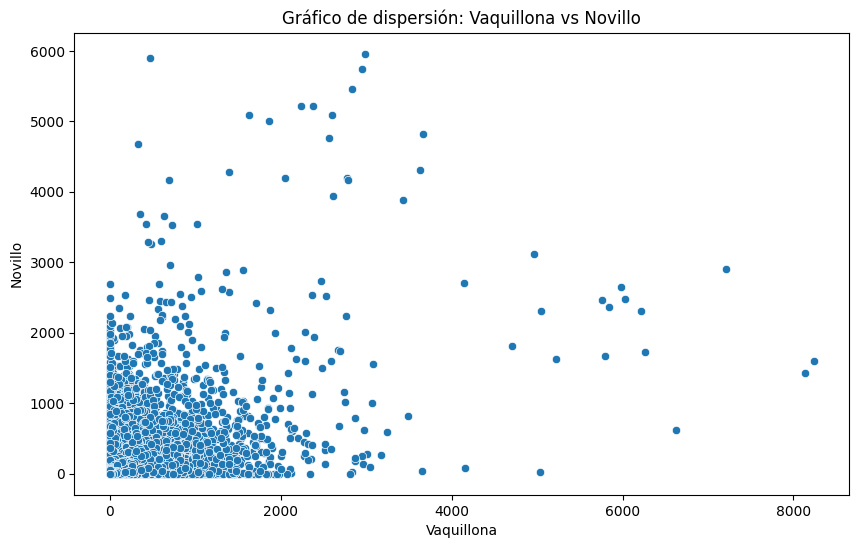

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vaquillona', y='novillo', data=df)
plt.title('Gráfico de dispersión: Vaquillona vs Novillo')
plt.xlabel('Vaquillona')
plt.ylabel('Novillo')
plt.show()


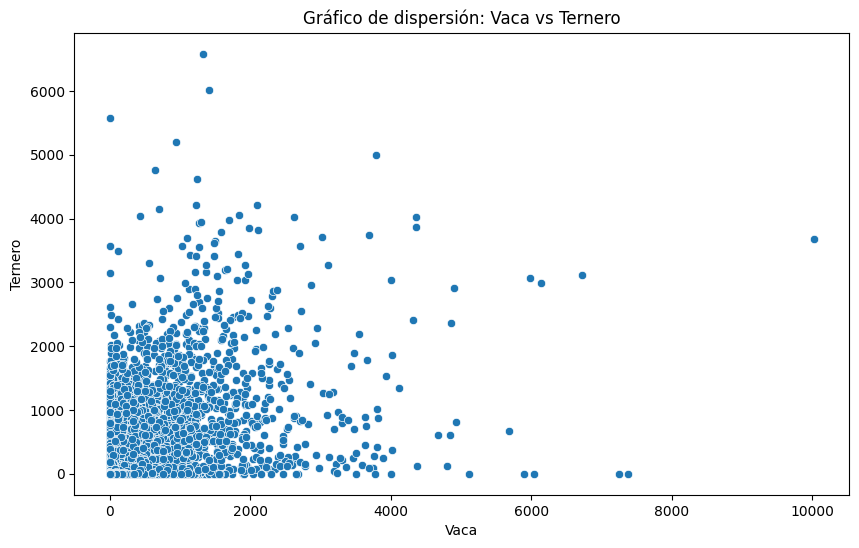

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vaca', y='ternero', data=df)
plt.title('Gráfico de dispersión: Vaca vs Ternero')
plt.xlabel('Vaca')
plt.ylabel('Ternero')
plt.show()

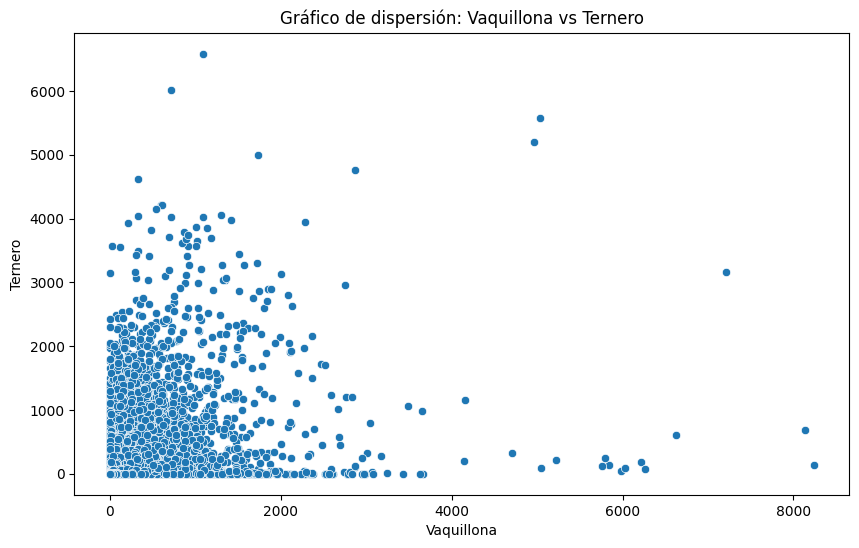

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vaquillona', y='ternero', data=df)
plt.title('Gráfico de dispersión: Vaquillona vs Ternero')
plt.xlabel('Vaquillona')
plt.ylabel('Ternero')
plt.show()

In [31]:
columnas_a_eliminar = ["vaca", "vaquilla", "vaquillona", "ternera", "torito", "toro", "bueyes"]
df = df.drop(columns=columnas_a_eliminar, errors="ignore")


In [32]:
df.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,departamento_origen,departamento_origen_id,provincia_destino,provincia_destino_id,departamento_destino,departamento_destino_id,novillo,novillito,ternero
0,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,25 de Mayo,6854,0,342,931
1,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,9 de Julio,6588,0,0,96
2,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Alberti,6021,0,0,31
3,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bolívar,6105,0,0,29
4,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bragado,6112,0,0,11


In [33]:
df = df[~((df["ternero"] == 0) & (df["novillo"] == 0) & (df["novillito"] == 0))]
df.head()

,fecha,origen,destino,provincia_origen,provincia_origen_id,departamento_origen,departamento_origen_id,provincia_destino,provincia_destino_id,departamento_destino,departamento_destino_id,novillo,novillito,ternero
0,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,25 de Mayo,6854,0,342,931
1,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,9 de Julio,6588,0,0,96
2,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Alberti,6021,0,0,31
3,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bolívar,6105,0,0,29
4,2018-01,Establecimiento,Establecimiento,Buenos Aires,6,25 de Mayo,6854,Buenos Aires,6,Bragado,6112,0,0,11


In [34]:
print("Tamaño actualizado de mi dataset:", df.shape)

Tamaño actualizado de mi dataset: (127034, 14)


Se comprobo la nueva distribucion de los datos donde se observa que la varivilidad de ternero, novillo y novillito sigue siendo alta.

<ipython-input-35-7c162c99b970>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='novillo', data=df, palette='pastel')


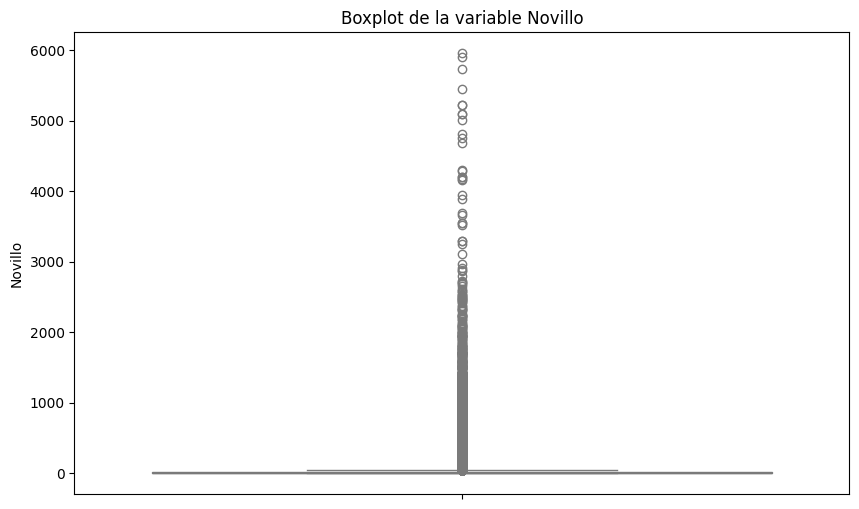

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='novillo', data=df, palette='pastel')
plt.title('Boxplot de la variable Novillo')
plt.ylabel('Novillo')
plt.show()

<ipython-input-36-168737b78924>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='novillito', data=df, palette='pastel')


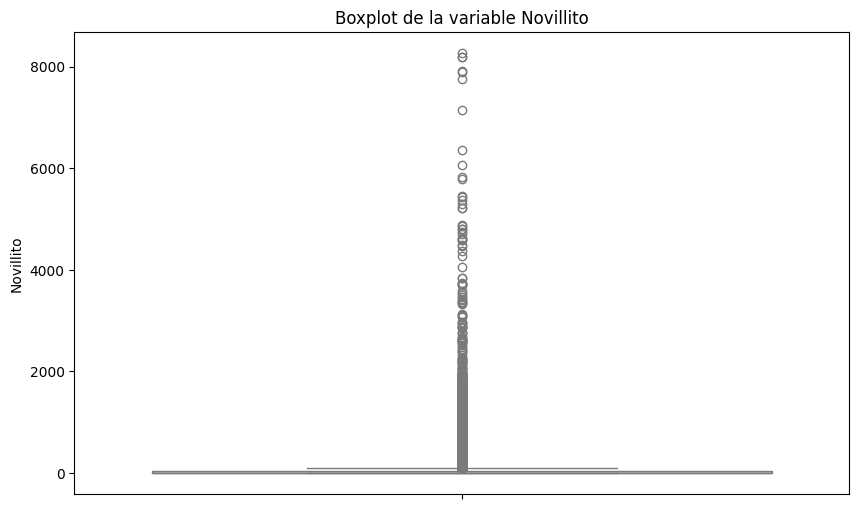

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='novillito', data=df, palette='pastel')
plt.title('Boxplot de la variable Novillito')
plt.ylabel('Novillito')
plt.show()

<ipython-input-37-75f196479d88>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='ternero', data=df, palette='pastel')


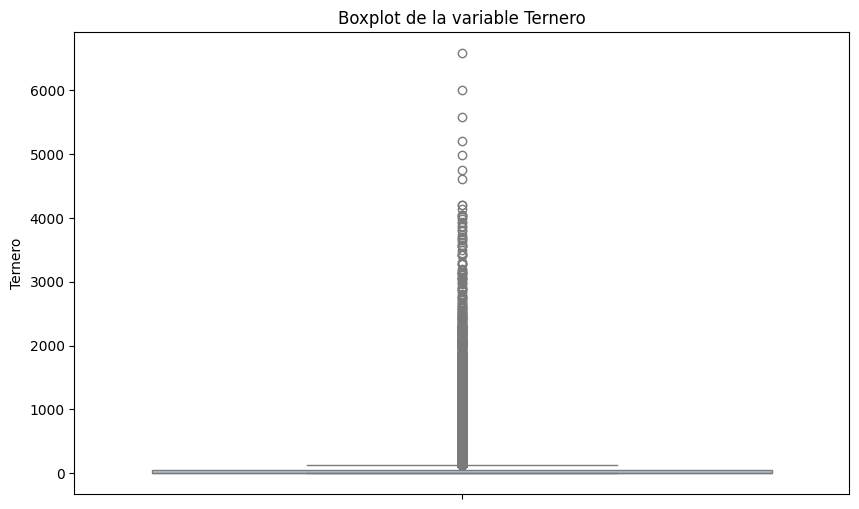

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='ternero', data=df, palette='pastel')
plt.title('Boxplot de la variable Ternero')
plt.ylabel('Ternero')
plt.show()

Analizando la cantidad de novillos, novillito y terneros por provicias a simple vista aparece un gran conglomerado: Provincia de Buenos Aires. La mayor concentración de estos animales coinciden con las provincias que poseen climas calidos y mucha pastura.

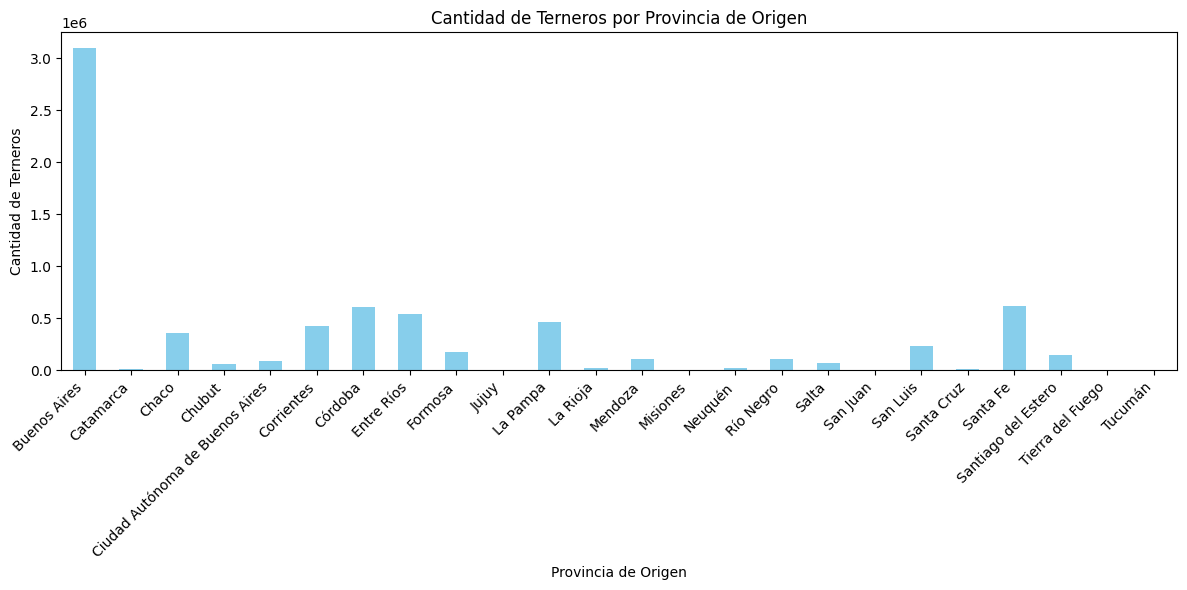

In [49]:
# Agrupar por provincia de origen y sumar la cantidad de terneros
terneros_por_provincia = df.groupby('provincia_origen')['ternero'].sum()

plt.figure(figsize=(12, 6))
terneros_por_provincia.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Terneros por Provincia de Origen')
plt.xlabel('Provincia de Origen')
plt.ylabel('Cantidad de Terneros')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()


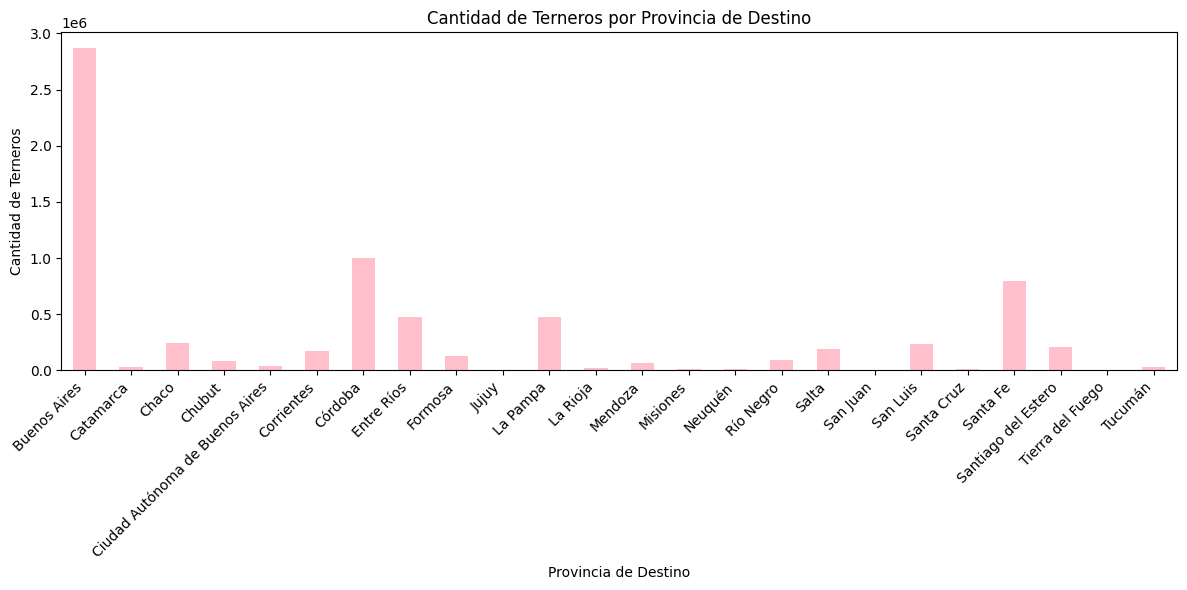

In [38]:
terneros_por_provincia = df.groupby('provincia_destino')['ternero'].sum()

plt.figure(figsize=(12, 6))
terneros_por_provincia.plot(kind='bar', color='pink')
plt.title('Cantidad de Terneros por Provincia de Destino')
plt.xlabel('Provincia de Destino')
plt.ylabel('Cantidad de Terneros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

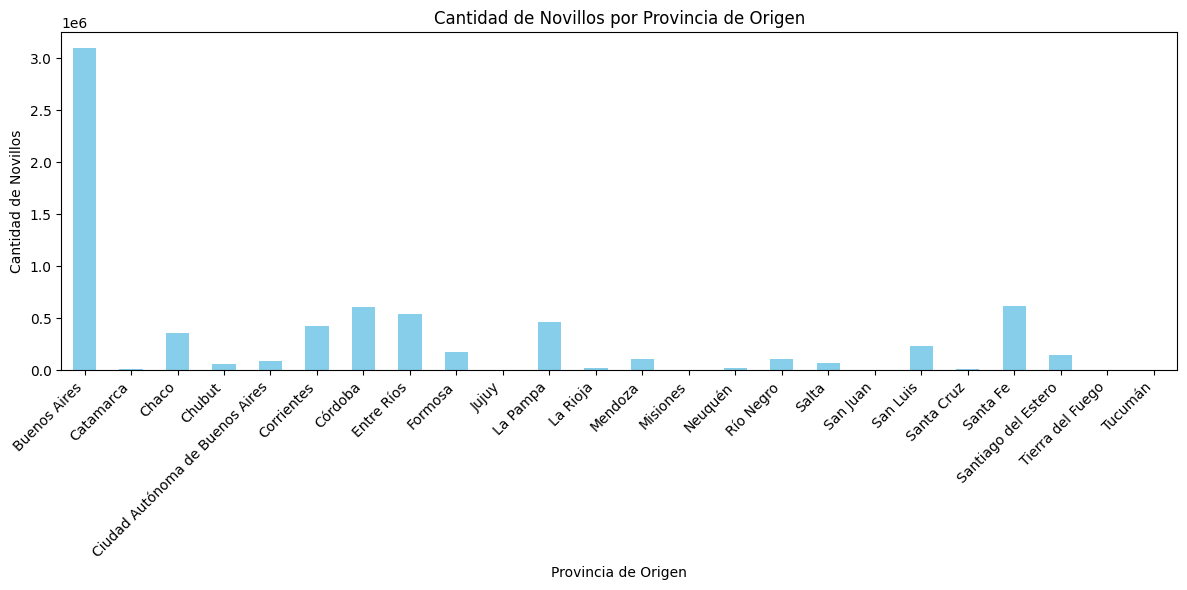

In [57]:
novillo_por_provincia = df.groupby('provincia_origen')['novillo'].sum()

plt.figure(figsize=(12, 6))
terneros_por_provincia.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Novillos por Provincia de Origen')
plt.xlabel('Provincia de Origen')
plt.ylabel('Cantidad de Novillos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

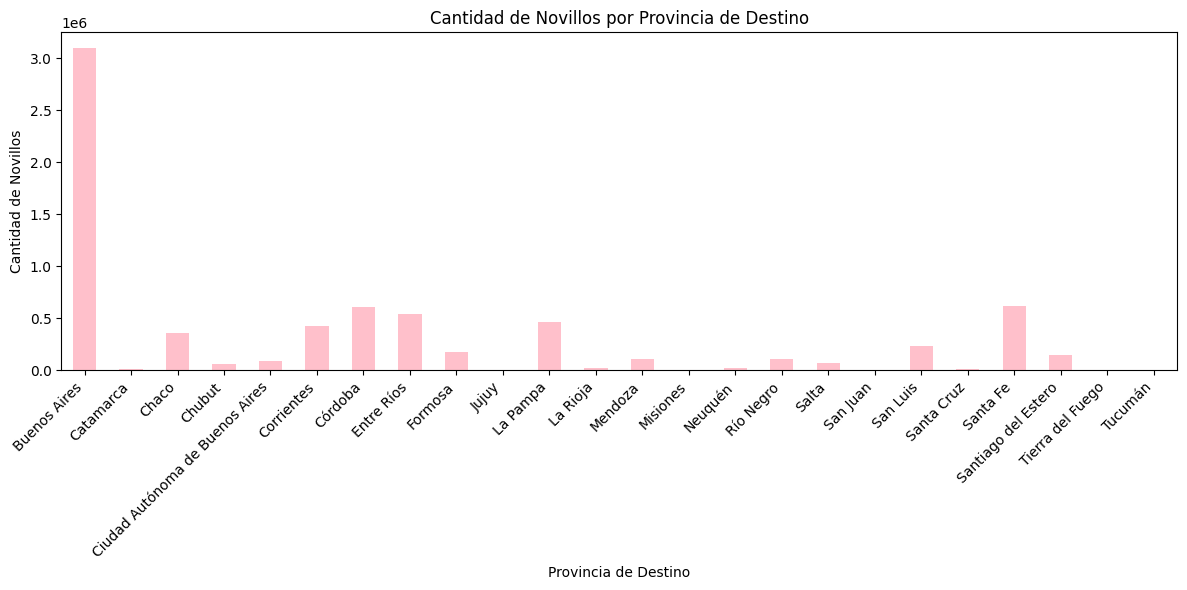

In [60]:
novillo_por_provincia = df.groupby('provincia_destino')['novillo'].sum()

plt.figure(figsize=(12, 6))
terneros_por_provincia.plot(kind='bar', color='pink')
plt.title('Cantidad de Novillos por Provincia de Destino')
plt.xlabel('Provincia de Destino')
plt.ylabel('Cantidad de Novillos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

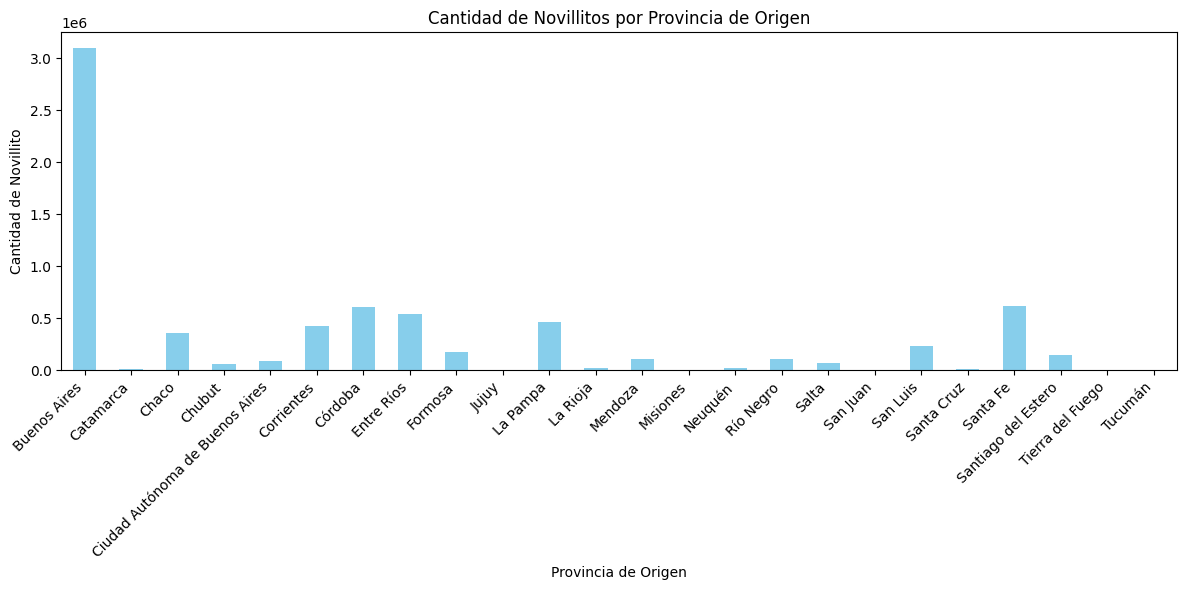

In [61]:
novillito_por_provincia = df.groupby('provincia_origen')['novillito'].sum()

plt.figure(figsize=(12, 6))
terneros_por_provincia.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Novillitos por Provincia de Origen')
plt.xlabel('Provincia de Origen')
plt.ylabel('Cantidad de Novillito')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

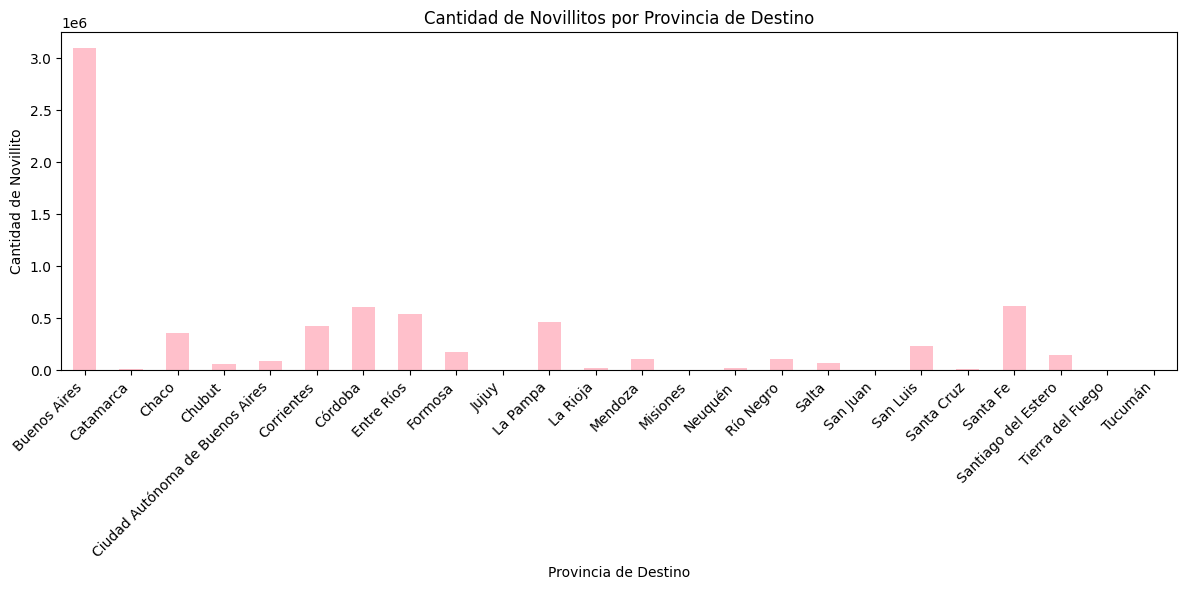

In [62]:
novillito_por_provincia = df.groupby('provincia_destino')['novillito'].sum()

plt.figure(figsize=(12, 6))
terneros_por_provincia.plot(kind='bar', color='pink')
plt.title('Cantidad de Novillitos por Provincia de Destino')
plt.xlabel('Provincia de Destino')
plt.ylabel('Cantidad de Novillito')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En el caso de los terneros el mayor porcentaje de movimientos se da entre establecimientos y en menor porcentaje en remates. Menos del 10% tienen como destino el frigorifico.

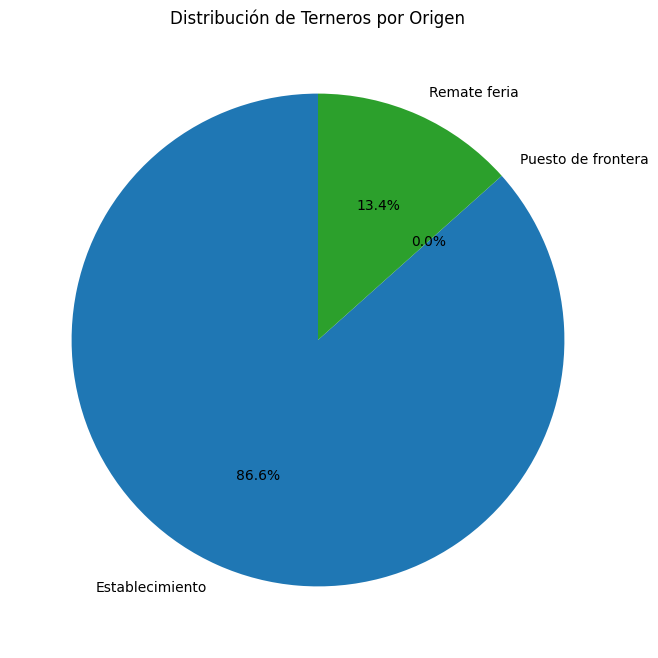

In [65]:
origen_terneros = df.groupby("origen")["ternero"].sum()
plt.figure(figsize=(8, 8))
plt.pie(origen_terneros, labels=origen_terneros.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Terneros por Origen")
plt.show()

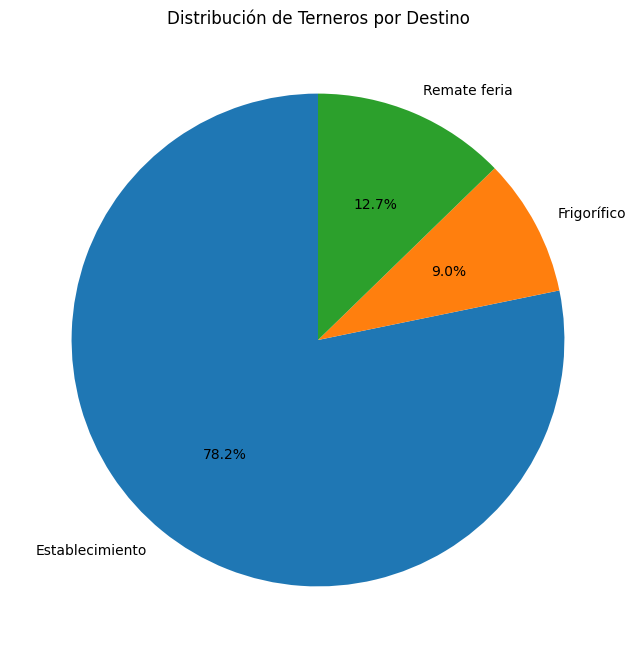

In [64]:
destino_terneros = df.groupby("destino")["ternero"].sum()

plt.figure(figsize=(8, 8))
plt.pie(destino_terneros, labels=destino_terneros.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Terneros por Destino")
plt.show()

El 92% de los novillos provienen de un establecimiento y el resto de los remates. Pero en este caso el 72% tiene como destino el frigorifico, el 19% otros establecimientos y el resto va a remate.

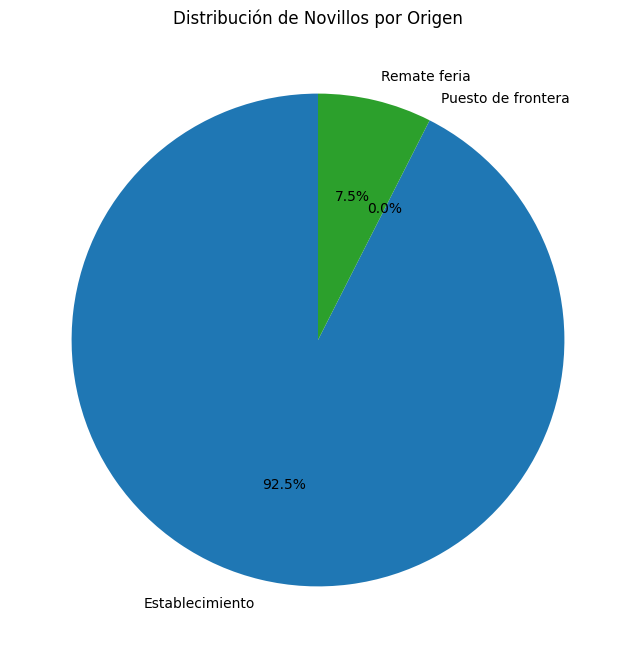

In [66]:
origen_novillo = df.groupby("origen")["novillo"].sum()
plt.figure(figsize=(8, 8))
plt.pie(origen_novillo, labels=origen_novillo.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Novillos por Origen")
plt.show()

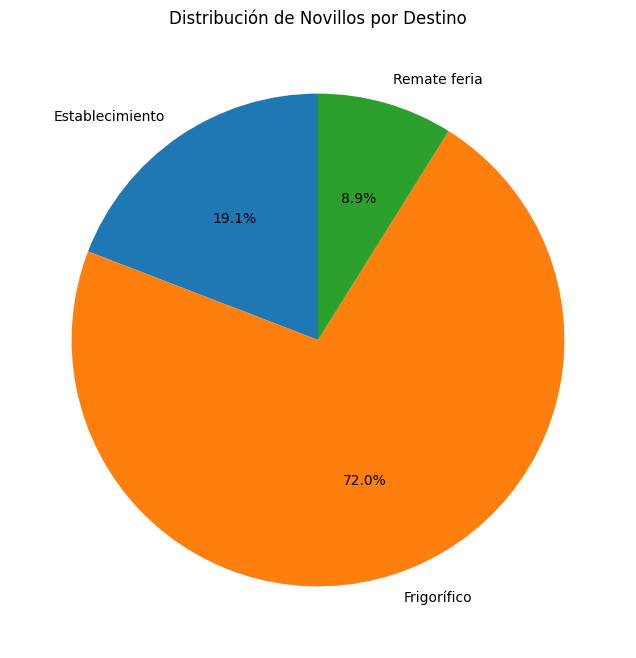

In [67]:
origen_novillo = df.groupby("destino")["novillo"].sum()
plt.figure(figsize=(8, 8))
plt.pie(origen_novillo, labels=origen_novillo.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Novillos por Destino")
plt.show()

El 89% de los novillitos provienen de un establecimiento y el resto de los remates. Pero en este caso el 50% tiene como destino el frigorifico, el 38% otros establecimientos y el resto va a remate.

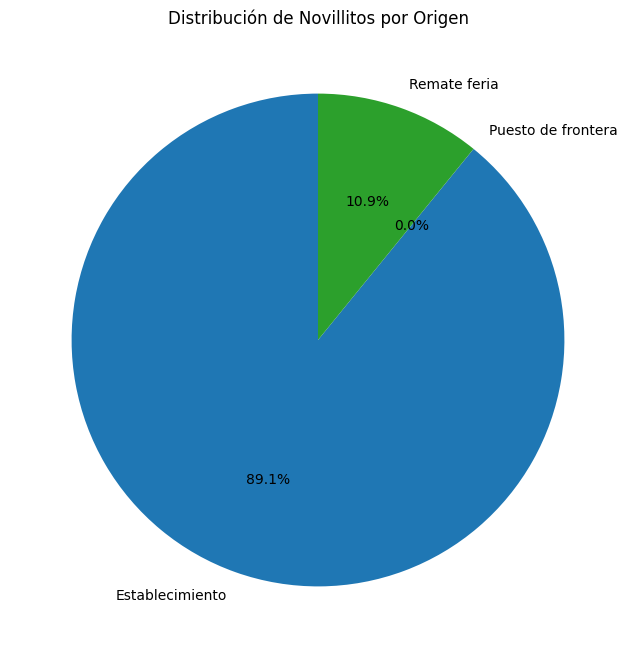

In [68]:
origen_novillito = df.groupby("origen")["novillito"].sum()
plt.figure(figsize=(8, 8))
plt.pie(origen_novillito, labels=origen_novillito.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Novillitos por Origen")
plt.show()

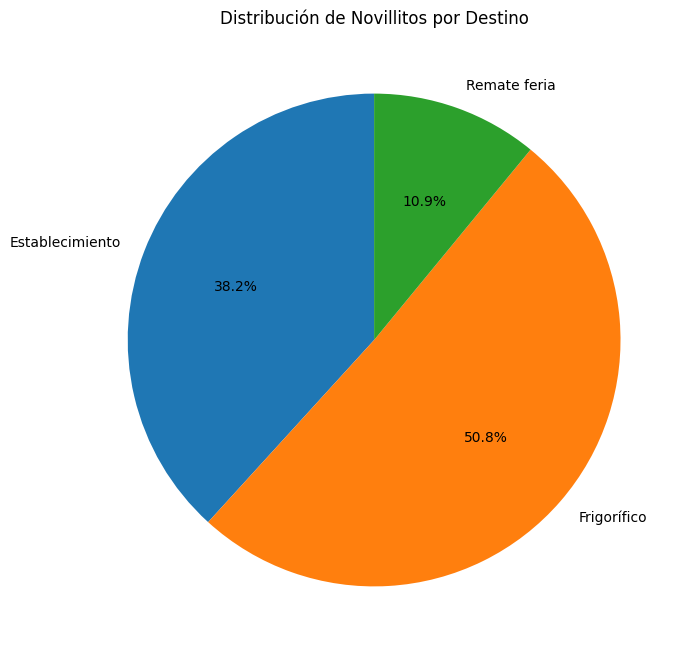

In [69]:
origen_novillito = df.groupby("destino")["novillito"].sum()
plt.figure(figsize=(8, 8))
plt.pie(origen_novillito, labels=origen_novillito.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Novillitos por Destino")
plt.show()

In [70]:
df["fecha"] = pd.to_datetime(df["fecha"].astype(str) + "-01")

En el caso de los terneros el pico en cantidad de movimientos se situa en el mes de abril y el mínimo se situa en noviembre.

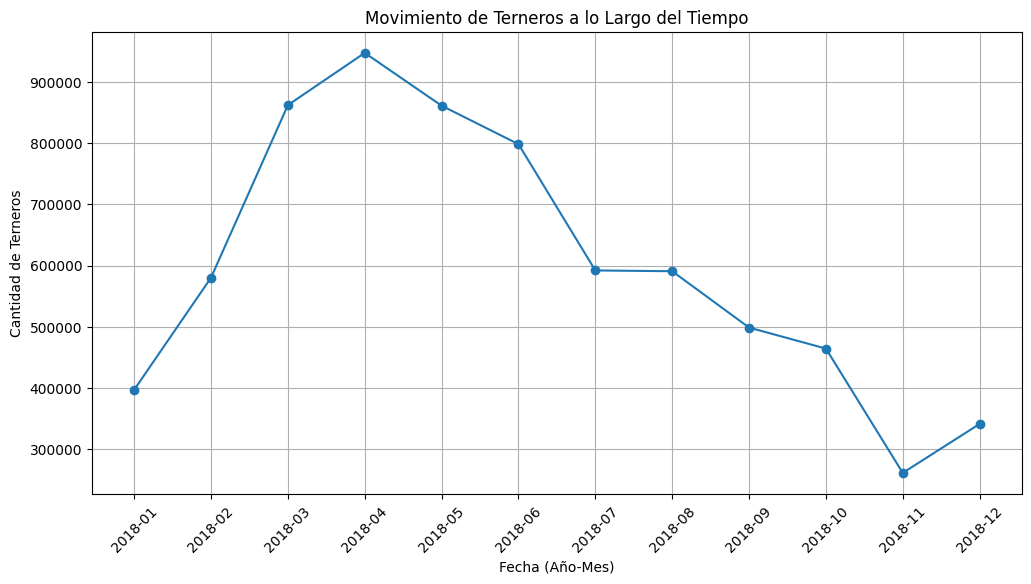

In [71]:
movimiento_mensual = df.groupby(df["fecha"].dt.strftime("%Y-%m"))["ternero"].sum()
plt.figure(figsize=(12, 6))
plt.plot(movimiento_mensual.index, movimiento_mensual.values, marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Cantidad de Terneros")
plt.title("Movimiento de Terneros a lo Largo del Tiempo")
plt.grid(True)
plt.show()

En el caso de los novillos hay un pico máximo en el mes de mayo y otro en menor catidad pero mayor al resto del año durante julio.
El minimo se situa en noviembre

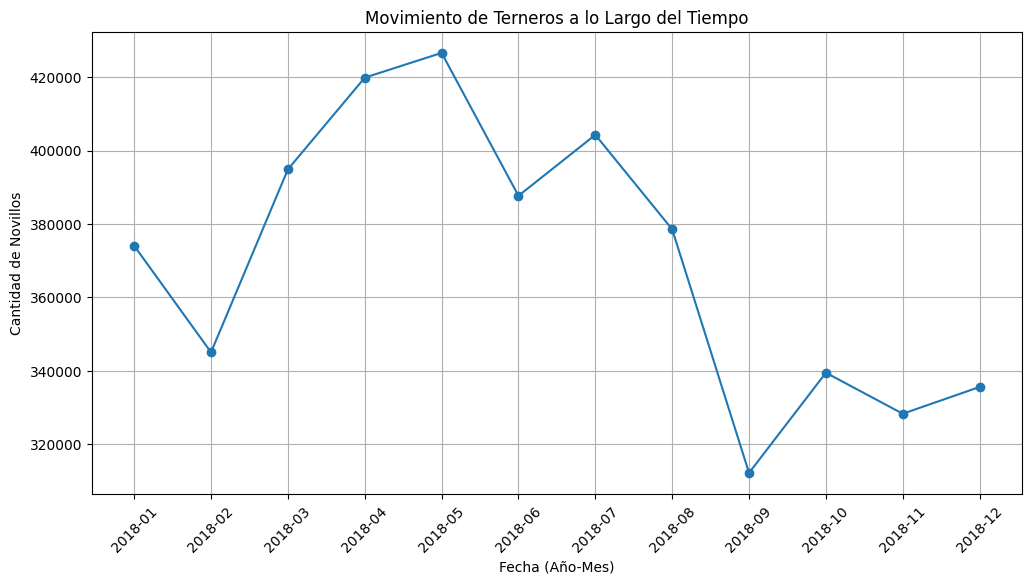

In [72]:
movimiento_mensual = df.groupby(df["fecha"].dt.strftime("%Y-%m"))["novillo"].sum()
plt.figure(figsize=(12, 6))
plt.plot(movimiento_mensual.index, movimiento_mensual.values, marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Cantidad de Novillos")
plt.title("Movimiento de Terneros a lo Largo del Tiempo")
plt.grid(True)
plt.show()

En el caso de novillitos el maximo se situa en el mes de diciebre y el minimo en el mes de septiembre.

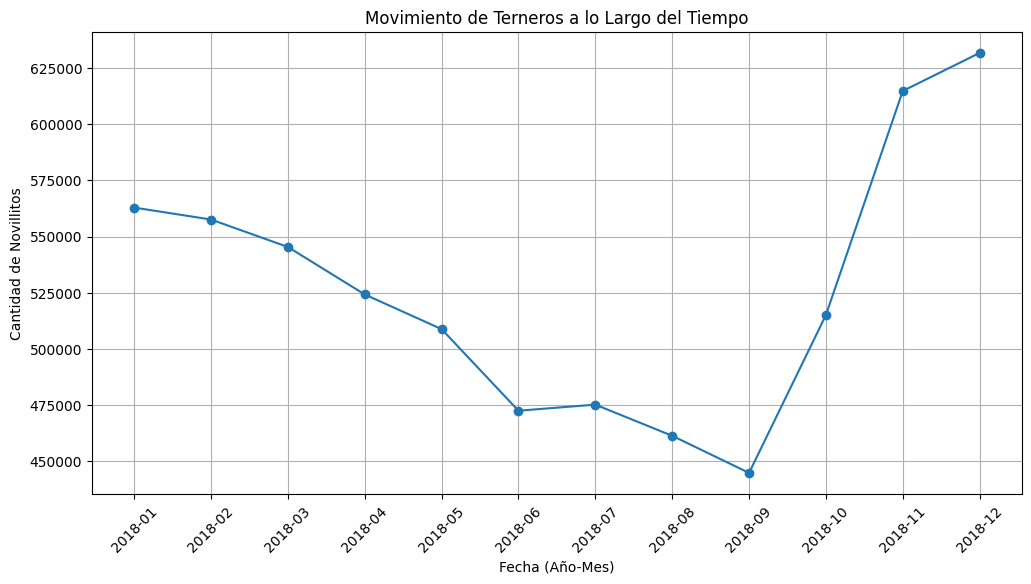

In [73]:
movimiento_mensual = df.groupby(df["fecha"].dt.strftime("%Y-%m"))["novillito"].sum()
plt.figure(figsize=(12, 6))
plt.plot(movimiento_mensual.index, movimiento_mensual.values, marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Cantidad de Novillitos")
plt.title("Movimiento de Terneros a lo Largo del Tiempo")
plt.grid(True)
plt.show()

#Conclusiones y Hallazgos
##Identificación de patrones de compra y venta por región
Se ha identificado que la Provincia de Buenos Aires se destaca como el principal centro de concentración de terneros, novillos y novillitos. Otras provincias con alta presencia de estos animales son aquellas que cuentan con climas cálidos y abundante pastura, lo que sugiere que la disponibilidad de recursos naturales es un factor determinante en la distribución del ganado. En contraste, las provincias de clima desértico presentan una cantidad relativamente baja de estos animales, aunque aún mantienen cierta actividad ganadera.
##Características de los movimientos del ganado
* Terneros:
** Mayormente trasladados entre establecimientos (~90%), con un porcentaje mucho menor destinado a remates.
** Solo menos del 10% tienen como destino un frigorífico, lo que indica que la mayoría sigue un proceso de crecimiento antes de su comercialización final.

* Novillos:
** 92% provienen de establecimientos y el resto de remates.
** La mayoría (72%) tienen como destino frigoríficos, lo que confirma su función dentro del ciclo de producción cárnica.
** Un 19% se traslada entre establecimientos, y el resto se comercializa en remates.
* Novillitos:
** 89% provienen de establecimientos, con una proporción menor proveniente de remates.
** En este caso, el 50% tiene como destino el frigorífico, mientras que el 38% es trasladado a otros establecimientos antes de su venta final.

## Factores geográficos y su influencia en los grupos de regiones
Los datos muestran que las regiones con climas favorables para la ganadería tienden a concentrar una mayor cantidad de movimientos de animales. Además, ciertas provincias parecen actuar como centros de distribución, ya sea para cría, engorde o comercialización final del ganado.

##Estacionalidad en los movimientos de ganado
Se han identificado patrones estacionales en los movimientos de cada categoría:

* Terneros: Mayor cantidad de traslados en abril, mientras que el mínimo ocurre en noviembre.
* Novillos:  Mayor cantidad de traslados en mayo, hay una caida en junio y vuelve a tener otro pico en julio, mientras que el mínimo ocurre en noviembre.
* Novillitos: Máximo movimiento en diciembre, con un mínimo en septiembre.

Estos picos pueden estar asociados a factores como ciclos productivos, condiciones climáticas y demanda del mercado cárnico en distintos momentos del año.

##Regiones como "centros de distribución"
El análisis confirma que existen provincias que actúan como nodos clave en la distribución de ganado. La Provincia de Buenos Aires, por su infraestructura y volumen de producción, es el principal centro de distribución, seguido por otras provincias con gran cantidad de pasturas.